<a href="https://colab.research.google.com/github/CheeseZyDev1/Google-Colab/blob/main/ModelSentimentReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-hub


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [ ]:
import pandas as pd

data = pd.read_csv('Instruments_Reviews_two_column.csv')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data['reviewText']
y = data['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง TfidfVectorizer เพื่อแปลงข้อความเป็นเวกเตอร์
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# ทดสอบโมเดล
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.66
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        28
           4       0.45      0.05      0.09       103
           5       0.66      0.98      0.79       261

    accuracy                           0.66       400
   macro avg       0.22      0.21      0.18       400
weighted avg       0.55      0.66      0.54       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# โหลดข้อมูลชุดทดสอบ (unseen test data)
unseen_test_data = pd.read_csv('unseenReview.csv')

# เตรียมข้อมูลในชุดทดสอบ
X_unseen_test = unseen_test_data['reviewText']
X_unseen_test_tfidf = tfidf_vectorizer.transform(X_unseen_test)

# ใช้โมเดลที่ฝึกสอนในขั้นตอนก่อนหน้า
y_unseen_test_pred = model.predict(X_unseen_test_tfidf)

# ประเมินผลลัพธ์
# คุณสามารถใช้ y_unseen_test_pred เพื่อดูผลการทำนาย sentiment ของโมเดลบนชุดทดสอบ



In [ ]:
for i, prediction in enumerate(y_unseen_test_pred):
    print(f"Review {i+1}: Predicted Sentiment: {prediction}")


Review 1: Predicted Sentiment: 5
Review 2: Predicted Sentiment: 5
Review 3: Predicted Sentiment: 5
Review 4: Predicted Sentiment: 5
Review 5: Predicted Sentiment: 5
Review 6: Predicted Sentiment: 5
Review 7: Predicted Sentiment: 5
Review 8: Predicted Sentiment: 5
Review 9: Predicted Sentiment: 5
Review 10: Predicted Sentiment: 5
Review 11: Predicted Sentiment: 5
Review 12: Predicted Sentiment: 4
Review 13: Predicted Sentiment: 5
Review 14: Predicted Sentiment: 5
Review 15: Predicted Sentiment: 5
Review 16: Predicted Sentiment: 5
Review 17: Predicted Sentiment: 5
Review 18: Predicted Sentiment: 5
Review 19: Predicted Sentiment: 5
Review 20: Predicted Sentiment: 5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# โหลดข้อมูล
data = pd.read_csv('Instruments_Reviews_two_column.csv')

# แยกข้อมูลเป็นชุดฝึกสอนและชุดทดสอบ
X = data['reviewText']
y = data['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง TfidfVectorizer เพื่อแปลงข้อความให้เป็นเวกเตอร์
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# สร้างโมเดล Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

# ทำนายคะแนนบนชุดทดสอบ
y_pred = clf.predict(X_test_tfidf)

# ประเมินประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


Accuracy: 0.65
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        28
           4       0.50      0.01      0.02       103
           5       0.65      1.00      0.79       261

    accuracy                           0.65       400
   macro avg       0.23      0.20      0.16       400
weighted avg       0.56      0.65      0.52       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# สร้าง TfidfVectorizer เพื่อแปลงข้อมูลทดสอบให้อยู่ในรูปแบบเวกเตอร์ TF-IDF
X_unseen_tfidf = tfidf_vectorizer.transform(X_unseen_test)  # X_unseen_test คือข้อมูลทดสอบ

# ทำนายคะแนนบนข้อมูลทดสอบ
y_unseen_pred = clf.predict(X_unseen_tfidf)


In [ ]:
# สร้างข้อมูลทดสอบ (unseen_data) เป็นรายการรีวิวที่คุณต้องการทดสอบ
unseen_data = [
    "This product exceeded my expectations. I'm very satisfied.",
    "I wouldn't recommend this to anyone. It's a waste of money.",
    "The quality of this item is fantastic!",
    "I've had better experiences with other brands.",
    "I can't believe how fast the shipping was. Impressed.",
    "The customer service was terrible. They were very unhelpful.",
    "It's an okay product, nothing special.",
    "I love it! It's exactly what I was looking for.",
    "The price is too high for the value it offers.",
    "The packaging arrived damaged, but the product was fine.",
    "I'm not sure if I'll buy from this brand again.",
    "The color is not as vibrant as it appeared in the picture.",
    "The instructions were unclear, and it was hard to assemble.",
    "It's a great deal for the price. Good value.",
    "The durability of this item is questionable.",
    "I'm really impressed with the features it offers.",
    "The size was too small for my needs.",
    "I received the wrong item in my order.",
    "The battery life is excellent.",
    "I had a pleasant shopping experience with this seller.",
    "The product arrived on time and in good condition.",
    "The item works perfectly as described.",
    "I'm extremely disappointed with this purchase.",
    "The customer support was very helpful and responsive.",
    "This is a must-have product for anyone.",
    "The packaging was eco-friendly, which is a plus.",
    "I regret buying this product. It's not worth the money.",
    "The product was damaged during shipping.",
    "I'm a repeat customer because of the high-quality products.",
    "The product is a bit overpriced for what you get.",
    "I'm thrilled with my purchase. Great value for the price.",
    "The item arrived late, and I needed it urgently.",
    "The seller provided excellent service throughout the process.",
    "The product is easy to use and very user-friendly.",
    "I had a problem with my order, but it was quickly resolved.",
    "The item was smaller than I expected.",
    "The instructions were clear and easy to follow.",
    "The product is exactly as described in the listing.",
    "I wish I had bought this product sooner. It's amazing!",
    "The item arrived damaged, and the customer service was unhelpful.",
    "I've recommended this product to all my friends.",
    "The product is worth every penny.",
    "I received a defective item and had to return it.",
    "The product is a game-changer. I can't live without it.",
    "The shipping was faster than I anticipated.",
    "The product is a great addition to my daily routine.",
    "I'm not satisfied with the quality of this product.",
    "The item arrived in perfect condition, and I'm very pleased.",
    "I had a great experience shopping with this seller."
]

# สร้างค่าเฉลี่ยหรือคำเฉลยของข้อมูลทดสอบ (unseen_labels) โดยใช้คะแนน 1-5 เป็นตัวอย่าง
unseen_labels = [5, 1, 5, 2, 4, 1, 3, 5, 2, 4, 3, 2, 4, 2, 5, 2, 1, 5, 4, 5,
                 5, 1, 5, 4, 4, 5, 1, 5, 2, 3, 3, 4, 5, 5, 2, 1, 3, 4, 1, 5,
                 2, 2, 1, 4, 5, 3, 5, 4, 3, 5]

# บันทึกข้อมูลทดสอบและค่าเฉลี่ยหรือคำเฉลยลงในไฟล์หรือโครงสร้างข้อมูลที่เหมาะสม
# ในรูปแบบที่คุณใช้ในการโหลดข้อมูลทดสอบตามที่คุณได้กำหนดไว้ในโค้ดก่อนหน้านี้
# แปลงข้อมูลทดสอบให้อยู่ในรูปแบบเวกเตอร์ TF-IDF (หากคุณใช้ TfidfVectorizer)
X_unseen_tfidf = tfidf_vectorizer.transform(unseen_data)

# ทำนายบนข้อมูลทดสอบ
y_unseen_pred = clf.predict(X_unseen_tfidf)

# ตัวอย่างการลบรายการแรกออกจากค่าเฉลี่ยหรือคำเฉลยของข้อมูลทดสอบ
unseen_labels = unseen_labels[1:]  # ลบรายการแรกออก


# ประเมินความแม่นยำบนข้อมูลทดสอบ
accuracy = accuracy_score(unseen_labels, y_unseen_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.31


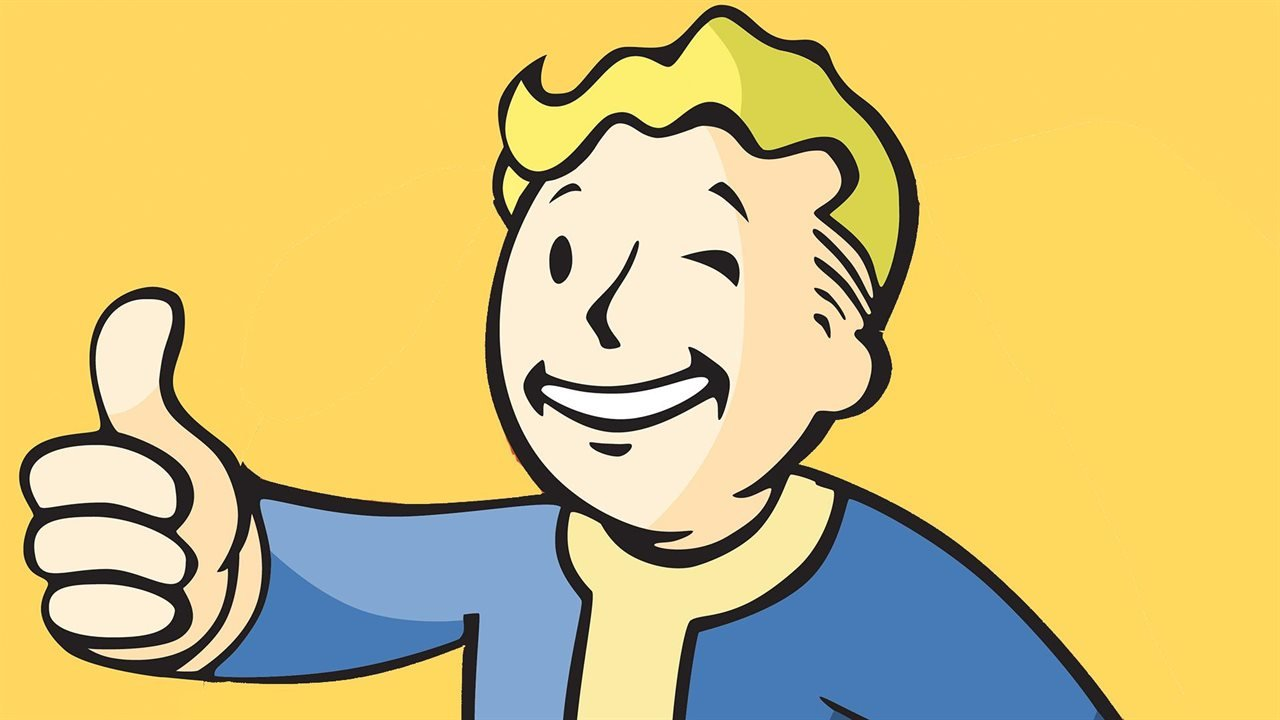